In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from cartopy.io.img_tiles import OSM
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from umap import UMAP  # Assurez-vous d'avoir la bibliothèque umap-learn installée

In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 950.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=7ebddc6108a0092d77ef270b66ea59d43a9f631f7a1ac013e3bfa2436d7f5ece
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
directory = "/content/gdrive/MyDrive/Jonas Valeurs acoustiques/2022/Antras_Isard/SM4564_702L_Bleu/"

In [ ]:
csv_file_path = os.path.join(directory, 'acoustic_indices.csv')

In [ ]:
df = pd.read_csv(csv_file_path)
df.head(2).T

,0,1
file_name,SMA04564_20220531_161726.wav,SMA04564_20220531_164702.wav
station_name,2022/Antras_Isard/SM4564_702L_Bleu/Data/,2022/Antras_Isard/SM4564_702L_Bleu/Data/
ZCR,26.5,0.0
MEANt,-0.071138,-0.072088
VARt,0.000943,0.000051
...,...,...
H_GiniSimpson,0.969171,0.988569
RAOQ,0.652523,0.890561
AGI,3.90822,1.281302
ROItotal,20,71


In [ ]:
df

,file_name,station_name,ZCR,MEANt,VARt,SKEWt,KURTt,LEQt,BGNt,SNRt,...,TFSD,H_Havrda,H_Renyi,H_pairedShannon,H_gamma,H_GiniSimpson,RAOQ,AGI,ROItotal,ROIcover
0,SMA04564_20220531_161726.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,26.500000,-0.071138,0.000943,18.844282,741.878546,70.804882,-20.364283,3.631517,...,0.755250,0.332384,2.930680,5.899521,42662.896368,0.969171,0.652523,3.908220,20,4.562954
1,SMA04564_20220531_164702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,0.000000,-0.072088,0.000051,0.003911,3.185880,70.220556,-20.692665,0.043466,...,0.711312,0.333275,4.325209,5.784790,19461.220470,0.988569,0.890561,1.281302,71,4.644769
2,SMA04564_20220531_171702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,1.700000,-0.072561,0.000240,-0.026333,4.415867,70.428267,-18.839075,0.173548,...,0.745316,0.332956,3.391270,5.055228,10507.448100,0.972643,0.408822,1.359625,78,1.551557
3,SMA04564_20220531_174702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,0.166667,-0.072394,0.000162,-0.011491,4.044512,70.347133,-19.333529,0.093239,...,0.729320,0.333169,3.808782,5.378254,12718.746077,0.981275,0.570758,1.323778,243,2.307376
4,SMA04564_20220531_181702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,300.900000,-0.072697,0.000586,-0.046556,6.230253,70.707393,-17.271708,0.602948,...,0.755059,0.333002,3.456844,4.914801,6822.684806,0.972457,0.225787,1.339269,87,0.479735
5,SMA04564_20220531_184702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,4.866667,-0.072656,0.000208,-0.029929,5.368572,70.413609,-19.316190,0.475028,...,0.734144,0.332768,3.190179,4.993947,9861.577479,0.967790,0.548847,1.342256,280,1.820033
6,SMA04564_20220531_191702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,58.833333,-0.072897,0.000415,-0.043171,5.130588,70.601177,-17.602104,-0.032271,...,0.758199,0.333013,3.473912,5.033391,8421.959352,0.973830,0.325266,1.353986,271,1.152802
7,SMA04564_20220531_194702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,25.666667,-0.072978,0.000306,-0.057748,6.840258,70.527034,-19.837542,1.345212,...,0.737856,0.332395,2.936470,4.697941,7007.436160,0.957570,0.272611,1.299529,289,3.697701
8,SMA04564_20220531_201702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,0.766667,-0.072828,0.000136,-0.021117,6.165607,70.376158,-19.937456,0.447242,...,0.748169,0.332645,3.091167,5.101045,11566.909593,0.967085,0.489789,1.348882,300,3.656742
9,SMA04564_20220531_204702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,0.033333,-0.072694,0.000130,-0.027555,6.421699,70.356402,-19.813177,0.263905,...,0.766879,0.332620,3.073149,5.115234,12377.674453,0.966797,0.523151,1.392113,399,7.564659


In [ ]:
# Séparer la chaîne en plusieurs parties en utilisant le délimiteur "/"
df_split = df['station_name'].str.split('/', expand=True)

# Extraire la partie pertinente pour chaque colonne
df['Annee'] = df_split[0]
df['Transect'] = df_split[2].str.split('_').str[1].str[:-1]
df['Dynamique'] = df_split[2].str.split('_').str[2].replace({'Bleu': 'bleu', 'Rouge': 'rouge'})
df['Position'] = df_split[2].str.split('_').str[1].str[-1].replace({'L': 'lisiere', 'E': 'estive'})

# Afficher le DataFrame résultant
df.head(2).T

# df_split.head(2).T

,0,1
file_name,SMA04564_20220531_161726.wav,SMA04564_20220531_164702.wav
station_name,2022/Antras_Isard/SM4564_702L_Bleu/Data/,2022/Antras_Isard/SM4564_702L_Bleu/Data/
ZCR,26.5,0.0
MEANt,-0.071138,-0.072088
VARt,0.000943,0.000051
...,...,...
ROIcover,4.562954,4.644769
Annee,2022,2022
Transect,702,702
Dynamique,bleu,bleu


In [ ]:
# Définir le chemin complet du fichier habitat_composition_by_station.csv
habitat_csv_path = "/content/gdrive/MyDrive/Jonas Valeurs acoustiques/habitat_composition_by_station.csv"

In [ ]:
df_habitat = pd.read_csv(habitat_csv_path)

In [ ]:
df_habitat.head(2).T

,0,1
LID,1,2
Site,A,A
Code,A1,A2
Commune,Mijanes,Mijanes
LD,Estagnet,Estagnet
Transect,375,375
Dynamique,rouge,rouge
Position,estive,lisiere
Annee,2022,2022
SMMini,5765,7108


In [ ]:
df_habitat_important = df_habitat[['Annee', 'Transect', 'Dynamique', 'Position', 'LON', 'LAT', 'Commune', 'LD']]

df_habitat_important.head(2)

,Annee,Transect,Dynamique,Position,LON,LAT,Commune,LD
0,2022,375,rouge,estive,1.9722,42.6886,Mijanes,Estagnet
1,2022,375,rouge,lisiere,1.9765,42.6899,Mijanes,Estagnet


In [ ]:
df.head(2)

,file_name,station_name,ZCR,MEANt,VARt,SKEWt,KURTt,LEQt,BGNt,SNRt,...,H_gamma,H_GiniSimpson,RAOQ,AGI,ROItotal,ROIcover,Annee,Transect,Dynamique,Position
0,SMA04564_20220531_161726.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,26.5,-0.071138,0.000943,18.844282,741.878546,70.804882,-20.364283,3.631517,...,42662.896368,0.969171,0.652523,3.908220,20,4.562954,2022,702,bleu,lisiere
1,SMA04564_20220531_164702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,0.0,-0.072088,0.000051,0.003911,3.185880,70.220556,-20.692665,0.043466,...,19461.220470,0.988569,0.890561,1.281302,71,4.644769,2022,702,bleu,lisiere


In [ ]:
# Convertir la colonne "Annee" en int64
df['Annee'] = df['Annee'].astype('int64')

# Convertir la colonne "Transect" en int64
df['Transect'] = df['Transect'].astype('int64')

In [ ]:
# Supposons que vous ayez déjà chargé votre dataframe df_habitat_important

# Filtrer les lignes avec Transect == 702
df_filtered = df_habitat_important[(df_habitat_important['Transect'] == df['Transect'][0]) & (df_habitat_important['Dynamique'] == df['Dynamique'][0])  & (df_habitat_important['Position'] == df['Position'][0])]

# Afficher le résultat
df_filtered

,Annee,Transect,Dynamique,Position,LON,LAT,Commune,LD
15,2023,702,bleu,lisiere,0.8873,42.8597,Antras,Isard


In [ ]:
df_filtered['LON']

15    0.8873
Name: LON, dtype: float64

In [ ]:
# Supposons que df_filtered contient une seule ligne avec la valeur de LON que vous souhaitez ajouter à df

# Extraire la valeur de LON de df_filtered
lon_value = df_filtered.at[df_filtered.index[0], 'LON']

# Extraire la valeur de LAT de df_filtered
lat_value = df_filtered.at[df_filtered.index[0], 'LAT']

# Ajouter une nouvelle colonne "LON" à df avec la valeur extraite
df['LON'] = lon_value

# Ajouter une nouvelle colonne "LAT" à df avec la valeur extraite
df['LAT'] = lat_value

# Afficher df pour vérifier
df.head(4).T


,0,1,2,3
file_name,SMA04564_20220531_161726.wav,SMA04564_20220531_164702.wav,SMA04564_20220531_171702.wav,SMA04564_20220531_174702.wav
station_name,2022/Antras_Isard/SM4564_702L_Bleu/Data/,2022/Antras_Isard/SM4564_702L_Bleu/Data/,2022/Antras_Isard/SM4564_702L_Bleu/Data/,2022/Antras_Isard/SM4564_702L_Bleu/Data/
ZCR,26.5,0.0,1.7,0.166667
MEANt,-0.071138,-0.072088,-0.072561,-0.072394
VARt,0.000943,0.000051,0.00024,0.000162
...,...,...,...,...
Transect,702,702,702,702
Dynamique,bleu,bleu,bleu,bleu
Position,lisiere,lisiere,lisiere,lisiere
LON,0.8873,0.8873,0.8873,0.8873


In [ ]:
df

,file_name,station_name,ZCR,MEANt,VARt,SKEWt,KURTt,LEQt,BGNt,SNRt,...,RAOQ,AGI,ROItotal,ROIcover,Annee,Transect,Dynamique,Position,LON,LAT
0,SMA04564_20220531_161726.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,26.500000,-0.071138,0.000943,18.844282,741.878546,70.804882,-20.364283,3.631517,...,0.652523,3.908220,20,4.562954,2022,702,bleu,lisiere,0.8873,42.8597
1,SMA04564_20220531_164702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,0.000000,-0.072088,0.000051,0.003911,3.185880,70.220556,-20.692665,0.043466,...,0.890561,1.281302,71,4.644769,2022,702,bleu,lisiere,0.8873,42.8597
2,SMA04564_20220531_171702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,1.700000,-0.072561,0.000240,-0.026333,4.415867,70.428267,-18.839075,0.173548,...,0.408822,1.359625,78,1.551557,2022,702,bleu,lisiere,0.8873,42.8597
3,SMA04564_20220531_174702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,0.166667,-0.072394,0.000162,-0.011491,4.044512,70.347133,-19.333529,0.093239,...,0.570758,1.323778,243,2.307376,2022,702,bleu,lisiere,0.8873,42.8597
4,SMA04564_20220531_181702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,300.900000,-0.072697,0.000586,-0.046556,6.230253,70.707393,-17.271708,0.602948,...,0.225787,1.339269,87,0.479735,2022,702,bleu,lisiere,0.8873,42.8597
5,SMA04564_20220531_184702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,4.866667,-0.072656,0.000208,-0.029929,5.368572,70.413609,-19.316190,0.475028,...,0.548847,1.342256,280,1.820033,2022,702,bleu,lisiere,0.8873,42.8597
6,SMA04564_20220531_191702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,58.833333,-0.072897,0.000415,-0.043171,5.130588,70.601177,-17.602104,-0.032271,...,0.325266,1.353986,271,1.152802,2022,702,bleu,lisiere,0.8873,42.8597
7,SMA04564_20220531_194702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,25.666667,-0.072978,0.000306,-0.057748,6.840258,70.527034,-19.837542,1.345212,...,0.272611,1.299529,289,3.697701,2022,702,bleu,lisiere,0.8873,42.8597
8,SMA04564_20220531_201702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,0.766667,-0.072828,0.000136,-0.021117,6.165607,70.376158,-19.937456,0.447242,...,0.489789,1.348882,300,3.656742,2022,702,bleu,lisiere,0.8873,42.8597
9,SMA04564_20220531_204702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,0.033333,-0.072694,0.000130,-0.027555,6.421699,70.356402,-19.813177,0.263905,...,0.523151,1.392113,399,7.564659,2022,702,bleu,lisiere,0.8873,42.8597


In [ ]:
df.to_csv('acoustic_indices_LON_LAT.csv')

In [ ]:
df_fn_sn = df[['file_name', 'station_name']].copy()
df.drop(columns=["file_name", "station_name"], inplace= True)

In [ ]:
# from sklearn.preprocessing import LabelEncoder


# # Instancier LabelEncoder
# label_encoder = LabelEncoder()

# # Initialiser un dictionnaire pour stocker les correspondances
# label_mapping = {}

# # Appliquer LabelEncoding aux colonnes qualitatives
# qualitative_cols = ['Dynamique', 'Position']
# for col in qualitative_cols:
#     df[col] = label_encoder.fit_transform(df[col])
#     # Stocker les correspondances dans le dictionnaire
#     label_mapping[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# # Afficher le dictionnaire de correspondance
# print("Dictionnaire de correspondance des labels :")
# for col, mapping in label_mapping.items():
#     print(f"{col}: {mapping}")

# # Afficher le DataFrame après les modifications
# print("\nDataFrame après les modifications :")
# df.head(2).T

In [ ]:
df.drop(columns=["Dynamique", "Position"], inplace= True)

In [ ]:
# Vérifier si merged_df contient des valeurs NaN
if df.isna().any().any():
    print("Le DataFrame contient des valeurs NaN.")
else:
    print("Le DataFrame ne contient pas de valeurs NaN.")

Le DataFrame contient des valeurs NaN.


In [ ]:
# Localiser les valeurs NaN dans merged_df
nan_locations = df.isna()

# Afficher les positions des valeurs NaN
print("Positions des valeurs NaN :")
print(nan_locations)

# Afficher les lignes contenant des valeurs NaN
nan_rows = df[nan_locations.any(axis=1)]
print("\nLignes contenant des valeurs NaN :")
nan_rows


Positions des valeurs NaN :
      ZCR  MEANt   VARt  SKEWt  KURTt   LEQt   BGNt   SNRt    MED     Ht  ...  \
0   False  False  False  False  False  False  False  False  False  False  ...   
1   False  False  False  False  False  False  False  False  False  False  ...   
2   False  False  False  False  False  False  False  False  False  False  ...   
3   False  False  False  False  False  False  False  False  False  False  ...   
4   False  False  False  False  False  False  False  False  False  False  ...   
5   False  False  False  False  False  False  False  False  False  False  ...   
6   False  False  False  False  False  False  False  False  False  False  ...   
7   False  False  False  False  False  False  False  False  False  False  ...   
8   False  False  False  False  False  False  False  False  False  False  ...   
9   False  False  False  False  False  False  False  False  False  False  ...   
10  False  False  False  False  False  False  False  False  False  False  ...   


,ZCR,MEANt,VARt,SKEWt,KURTt,LEQt,BGNt,SNRt,MED,Ht,...,H_gamma,H_GiniSimpson,RAOQ,AGI,ROItotal,ROIcover,Annee,Transect,LON,LAT
1,0.000000,-0.072088,0.000051,0.003911,3.185880,70.220556,-20.692665,0.043466,0.092335,0.999543,...,19461.220470,0.988569,0.890561,1.281302,71,4.644769,2022,702,0.8873,42.8597
3,0.166667,-0.072394,0.000162,-0.011491,4.044512,70.347133,-19.333529,0.093239,0.107975,0.997016,...,12718.746077,0.981275,0.570758,1.323778,243,2.307376,2022,702,0.8873,42.8597
10,0.000000,-0.072802,0.000051,0.003238,3.431263,70.305018,-20.716658,0.083971,0.092080,0.999347,...,17235.799137,0.983575,0.592233,1.342472,301,6.764858,2022,702,0.8873,42.8597
12,0.000000,-0.072976,0.000079,0.003307,5.079686,70.348330,-20.430637,0.359608,0.095163,0.997580,...,17407.264075,0.985445,0.805686,1.255975,47,0.531742,2022,702,0.8873,42.8597
17,0.000000,-0.073164,0.000105,0.021331,4.050718,70.391307,-20.168571,0.184577,0.098078,0.998260,...,16480.491228,0.961894,0.573102,1.292835,131,2.687683,2022,702,0.8873,42.8597
18,0.000000,-0.073005,0.000066,0.009577,5.287072,70.341287,-20.686360,0.326567,0.092402,0.997739,...,17202.929924,0.984503,0.803251,1.331670,140,4.822364,2022,702,0.8873,42.8597
19,0.000000,-0.073031,0.000049,-0.012052,6.389487,70.330272,-20.964237,0.346137,0.089493,0.997739,...,15761.381000,0.987218,0.808095,1.377122,127,6.142443,2022,702,0.8873,42.8597
22,0.000000,-0.072363,0.000041,0.013206,3.615710,70.244823,-20.926330,0.091041,0.089884,0.999328,...,45286.641506,0.990711,0.730839,1.428105,3,3.493738,2022,702,0.8873,42.8597
27,0.000000,-0.072371,0.000046,-0.017380,3.615523,70.250082,-20.844028,0.115951,0.090740,0.999276,...,43825.765284,0.990017,0.640304,1.469113,27,8.410632,2022,702,0.8873,42.8597


In [ ]:
# Compter le nombre de NaN par colonne
nan_count = df.isna().sum()

# Afficher le nombre de NaN par colonne
print("Nombre de NaN par colonne :")
for feature, val in nan_count.items():
  print(feature, ":", val)

Nombre de NaN par colonne :
ZCR : 0
MEANt : 0
VARt : 0
SKEWt : 0
KURTt : 0
LEQt : 0
BGNt : 0
SNRt : 0
MED : 0
Ht : 0
ACTtFraction : 0
ACTtCount : 0
ACTtMean : 9
EVNtFraction : 0
EVNtMean : 0
EVNtCount : 0
MEANf : 0
VARf : 0
SKEWf : 0
KURTf : 0
NBPEAKS : 0
LEQf : 0
ENRf : 0
BGNf : 0
SNRf : 0
Hf : 0
EAS : 0
ECU : 0
ECV : 0
EPS : 0
EPS_KURT : 0
EPS_SKEW : 0
ACI : 0
NDSI : 0
rBA : 0
AnthroEnergy : 0
BioEnergy : 0
BI : 0
ROU : 0
ADI : 0
AEI : 0
LFC : 0
MFC : 0
HFC : 0
ACTspFract : 0
ACTspCount : 0
ACTspMean : 0
EVNspFract : 0
EVNspMean : 0
EVNspCount : 0
TFSD : 0
H_Havrda : 0
H_Renyi : 0
H_pairedShannon : 0
H_gamma : 0
H_GiniSimpson : 0
RAOQ : 0
AGI : 0
ROItotal : 0
ROIcover : 0
Annee : 0
Transect : 0
LON : 0
LAT : 0


In [ ]:
# Supprimer les colonnes contenant des valeurs NaN
df = df.dropna(axis=1)

# Réinitialiser les index après la suppression des colonnes
df = df.reset_index(drop=True)

In [ ]:
df

,ZCR,MEANt,VARt,SKEWt,KURTt,LEQt,BGNt,SNRt,MED,Ht,...,H_gamma,H_GiniSimpson,RAOQ,AGI,ROItotal,ROIcover,Annee,Transect,LON,LAT
0,26.500000,-0.071138,0.000943,18.844282,741.878546,70.804882,-20.364283,3.631517,0.095893,0.768039,...,42662.896368,0.969171,0.652523,3.908220,20,4.562954,2022,702,0.8873,42.8597
1,0.000000,-0.072088,0.000051,0.003911,3.185880,70.220556,-20.692665,0.043466,0.092335,0.999543,...,19461.220470,0.988569,0.890561,1.281302,71,4.644769,2022,702,0.8873,42.8597
2,1.700000,-0.072561,0.000240,-0.026333,4.415867,70.428267,-18.839075,0.173548,0.114300,0.995125,...,10507.448100,0.972643,0.408822,1.359625,78,1.551557,2022,702,0.8873,42.8597
3,0.166667,-0.072394,0.000162,-0.011491,4.044512,70.347133,-19.333529,0.093239,0.107975,0.997016,...,12718.746077,0.981275,0.570758,1.323778,243,2.307376,2022,702,0.8873,42.8597
4,300.900000,-0.072697,0.000586,-0.046556,6.230253,70.707393,-17.271708,0.602948,0.136904,0.985898,...,6822.684806,0.972457,0.225787,1.339269,87,0.479735,2022,702,0.8873,42.8597
5,4.866667,-0.072656,0.000208,-0.029929,5.368572,70.413609,-19.316190,0.475028,0.108191,0.994042,...,9861.577479,0.967790,0.548847,1.342256,280,1.820033,2022,702,0.8873,42.8597
6,58.833333,-0.072897,0.000415,-0.043171,5.130588,70.601177,-17.602104,-0.032271,0.131794,0.990245,...,8421.959352,0.973830,0.325266,1.353986,271,1.152802,2022,702,0.8873,42.8597
7,25.666667,-0.072978,0.000306,-0.057748,6.840258,70.527034,-19.837542,1.345212,0.101888,0.987936,...,7007.436160,0.957570,0.272611,1.299529,289,3.697701,2022,702,0.8873,42.8597
8,0.766667,-0.072828,0.000136,-0.021117,6.165607,70.376158,-19.937456,0.447242,0.100723,0.994679,...,11566.909593,0.967085,0.489789,1.348882,300,3.656742,2022,702,0.8873,42.8597
9,0.033333,-0.072694,0.000130,-0.027555,6.421699,70.356402,-19.813177,0.263905,0.102174,0.994631,...,12377.674453,0.966797,0.523151,1.392113,399,7.564659,2022,702,0.8873,42.8597


In [ ]:
df_LON_LAT = df[['LON', 'LAT']].copy()

# -----------------

df.drop(columns=['LON', 'LAT'], inplace=True)

In [ ]:
# ACP
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# t-SNE
tsne = TSNE(n_components=2, perplexity=5)
tsne_result = tsne.fit_transform(df)

# uMAP
umap_result = UMAP(n_components=2).fit_transform(df)

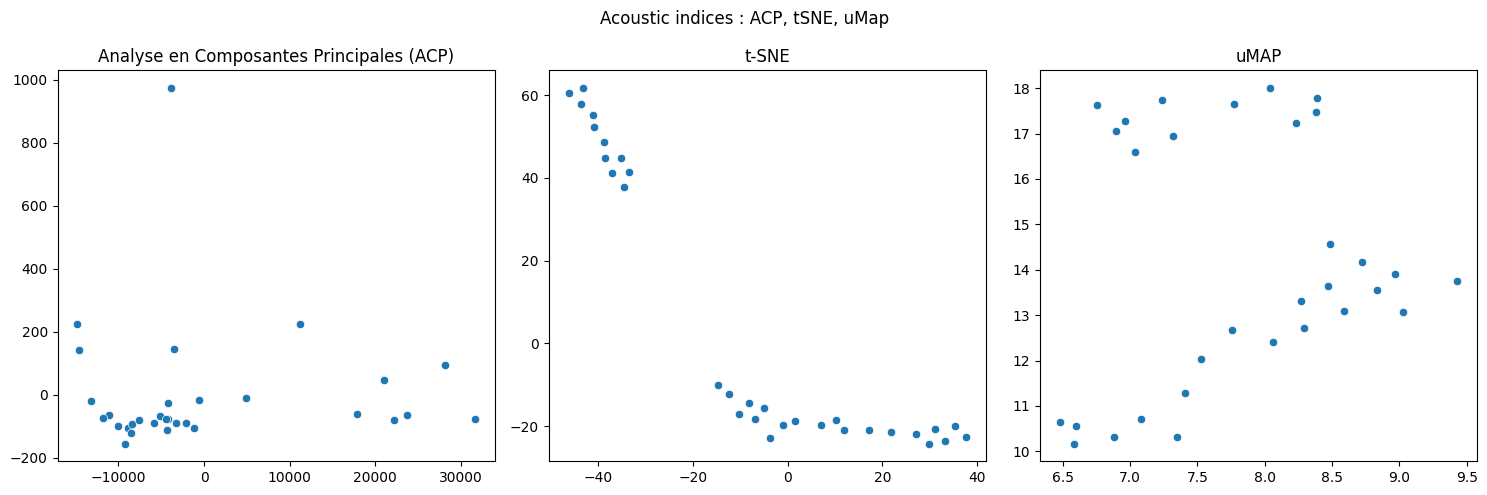

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un tracé avec 3 sous-tracés (subplots)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Affichage des résultats de l'ACP sur le premier subplot
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=axes[0])
axes[0].set_title('Analyse en Composantes Principales (ACP)')

# Affichage des résultats de t-SNE sur le deuxième subplot
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], ax=axes[1])
axes[1].set_title('t-SNE')

# Affichage des résultats de uMAP sur le troisième subplot
sns.scatterplot(x=umap_result[:,0], y=umap_result[:,1], ax=axes[2])
axes[2].set_title('uMAP')

# Ajouter un titre global au tracé
plt.suptitle('Acoustic indices : ACP, tSNE, uMap')

# Afficher le tracé avec les sous-tracés
plt.tight_layout()
plt.savefig("/content/gdrive/MyDrive/Valeurs acoustiques/2022/Antras_Isard/SM4564_702L_Bleu/acoustic_indices_acp_tsne_umap.png")
plt.show()

In [ ]:
!pip install mplleaflet
!pip install osmnx
!pip install cartopy
!pip install pyquickhelper
!pip install dbfread
!pip install papierstat
!pip install pyensae
!pip install umap-learn

  Preparing metadata (setup.py) ... done
  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-py3-none-any.whl size=28565 sha256=1c838d777421982fabe1b37319a599e172fb58c623b1a694c14eac2bc85e7076
  Stored in directory: /root/.cache/pip/wheels/0d/00/a9/595e650d2e0a5ca4119c0f6e03dfd1093e5d67fe2c0e5d49f0
Successfully built mplleaflet
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyquicksetup: filename=pyquicksetup-0.2.4-py3-none-any.whl size=6710 sha256=5e3d04b5ee9529da9c4b7b266f7cc8573f42e501399bf1438ca4256a3ffcccf1
  Stored in directory: /root/.cache/pip/wheels/37/be/8e/de24987fe1693d9c54ac697d5dfa8762422350c6d57

In [ ]:
lon_min, lon_max, lat_min, lat_max = 0, 2, 42, 44

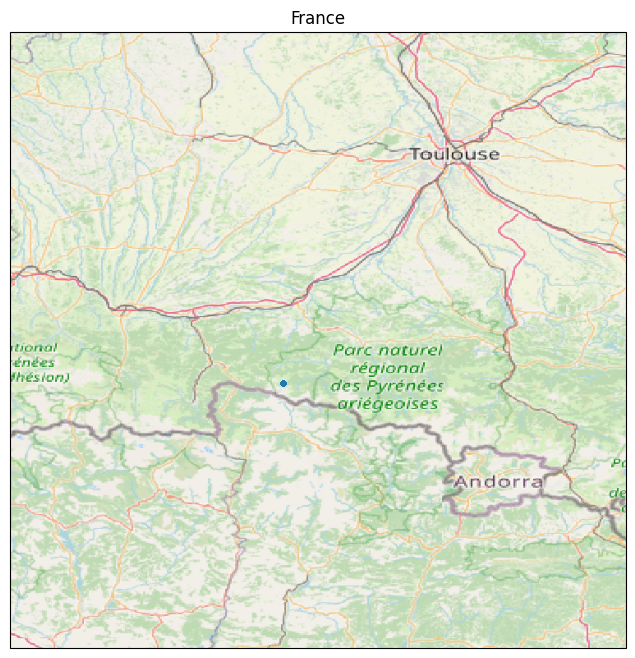

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

imagery = OSM()
ax.add_image(imagery, 8)
# plus c'est grand, plus c'est précis, plus ça prend du temps

# -----------------
df = pd.concat([df, df_LON_LAT], axis=1)
ax.plot(df.LON, df.LAT, '.')
ax.set_title('France');

In [ ]:
df = pd.concat([df, df_fn_sn], axis=1)

In [ ]:
df.head(2).T

,0,1
ZCR,26.5,0.0
MEANt,-0.071138,-0.072088
VARt,0.000943,0.000051
SKEWt,18.844282,0.003911
KURTt,741.878546,3.18588
...,...,...
Transect,702,702
LON,0.8873,0.8873
LAT,42.8597,42.8597
file_name,SMA04564_20220531_161726.wav,SMA04564_20220531_164702.wav


In [ ]:
# Fonction pour convertir l'heure au format "HHMMSS" en minutes
def convertir_en_minutes(heure_str):
    # Diviser la chaîne en parties en utilisant '_' comme séparateur
    parties = heure_str.split('_')

    # Extraire les heures, minutes et secondes de la partie qui contient l'heure
    heures = int(parties[-1][0:2])
    minutes = int(parties[-1][2:4])
    secondes = int(parties[-1][4:6])

    # Calculer le total des minutes
    total_minutes = heures * 60 + minutes
    return total_minutes

# Créer une nouvelle colonne 'Heure' en utilisant la fonction de conversion
df['Heure(min)'] = df['file_name'].apply(convertir_en_minutes)

In [ ]:
df.head(2).T

,0,1
ZCR,26.5,0.0
MEANt,-0.071138,-0.072088
VARt,0.000943,0.000051
SKEWt,18.844282,0.003911
KURTt,741.878546,3.18588
...,...,...
LON,0.8873,0.8873
LAT,42.8597,42.8597
file_name,SMA04564_20220531_161726.wav,SMA04564_20220531_164702.wav
station_name,2022/Antras_Isard/SM4564_702L_Bleu/Data/,2022/Antras_Isard/SM4564_702L_Bleu/Data/


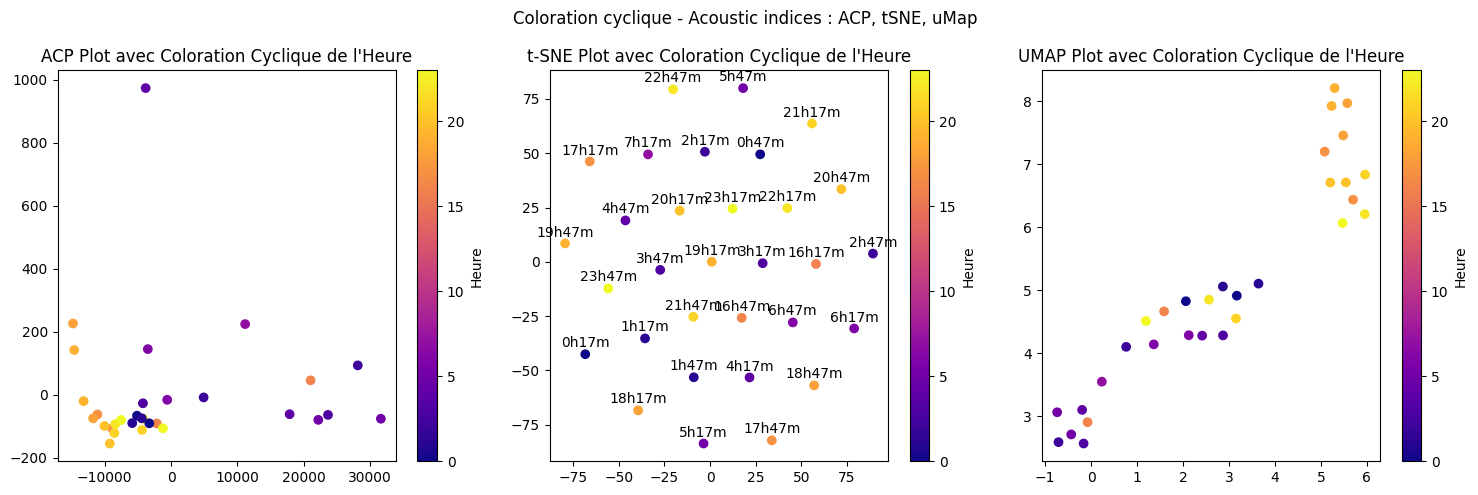

In [ ]:
# Convertir les Heure(min) en heures et minutes
df['Heures'] = df['Heure(min)'] // 60
df['Minutes'] = df['Heure(min)'] % 60

# Encodage cyclique avec le sinus
df['Heure_encoded'] = np.sin(2 * np.pi * df['Heure(min)'] / 1440)  # 1440 minutes dans une journée

# Dimensionality reduction avec ACP
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df.drop(['Heure(min)', 'file_name', 'station_name'], axis=1)), columns=['Dim1', 'Dim2'])

# Dimensionality reduction avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df.drop(['Heure(min)', 'file_name', 'station_name'], axis=1)), columns=['Dim1', 'Dim2'])

# Dimensionality reduction avec UMAP
umap = UMAP(n_components=2)
df_umap = pd.DataFrame(umap.fit_transform(df.drop(['Heure(min)', 'file_name', 'station_name'], axis=1)), columns=['Dim1', 'Dim2'])

# Plot avec trois subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot avec ACP
scatter_pca = axs[0].scatter(df_pca['Dim1'], df_pca['Dim2'], c=df['Heures'], cmap='plasma')
cbar_pca = plt.colorbar(scatter_pca, ax=axs[0], label='Heure')
axs[0].set_title('ACP Plot avec Coloration Cyclique de l\'Heure')

# Plot avec t-SNE
scatter_tsne = axs[1].scatter(df_tsne['Dim1'], df_tsne['Dim2'], c=df['Heures'], cmap='plasma')
cbar_tsne = plt.colorbar(scatter_tsne, ax=axs[1], label='Heure')
axs[1].set_title('t-SNE Plot avec Coloration Cyclique de l\'Heure')

# Ajouter des étiquettes aux points du plot avec heures et minutes
for i, txt in enumerate(df['Heure(min)']):
    axs[1].annotate(f"{int(df['Heures'][i])}h{int(df['Minutes'][i])}m", (df_tsne['Dim1'][i], df_tsne['Dim2'][i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Plot avec UMAP
scatter_umap = axs[2].scatter(df_umap['Dim1'], df_umap['Dim2'], c=df['Heures'], cmap='plasma')
cbar_umap = plt.colorbar(scatter_umap, ax=axs[2], label='Heure')
axs[2].set_title('UMAP Plot avec Coloration Cyclique de l\'Heure')
plt.suptitle('Coloration cyclique - Acoustic indices : ACP, tSNE, uMap')

plt.tight_layout()
plt.savefig("/content/gdrive/MyDrive/Jonas Valeurs acoustiques/2022/Antras_Isard/SM4564_702L_Bleu/coloration_cyclique_acoustic_indices_acp_tsne_umap.png")

plt.show()

In [ ]:
df.head(2).T

,0,1
ZCR,26.5,0.0
MEANt,-0.071138,-0.072088
VARt,0.000943,0.000051
SKEWt,18.844282,0.003911
KURTt,741.878546,3.18588
...,...,...
Heure(min),977,1007
Heure_encoded(min),-0.900698,-0.949699
Heures,16,16
Minutes,17,47


In [ ]:
df.drop(columns=["Heure(min)", "Heure_encoded(min)", "Heures", "Minutes", "Heure_encoded"], inplace=True)

In [ ]:
df.head(2).T

,0,1
ZCR,26.5,0.0
MEANt,-0.071138,-0.072088
VARt,0.000943,0.000051
SKEWt,18.844282,0.003911
KURTt,741.878546,3.18588
...,...,...
Transect,702,702
LON,0.8873,0.8873
LAT,42.8597,42.8597
file_name,SMA04564_20220531_161726.wav,SMA04564_20220531_164702.wav


-----

### K-means

In [ ]:
from sklearn.cluster import KMeans

# Effectuer le clustering K-means sur les données ACP
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

# Encodage de chaque point avec l'identifiant de son cluster
df['Cluster_ACP'] = cluster_labels

# Effectuer le clustering K-means sur les données t-SNE
kmeans_tsne = KMeans(n_clusters=2, random_state=42)
cluster_labels_tsne = kmeans_tsne.fit_predict(tsne_result)

# Encodage de chaque point avec l'identifiant de son cluster
df['Cluster_tSNE'] = cluster_labels_tsne

# Effectuer le clustering K-means sur les données UMAP
kmeans_umap = KMeans(n_clusters=2, random_state=42)
cluster_labels_umap = kmeans_umap.fit_predict(umap_result)

# Encodage de chaque point avec l'identifiant de son cluster
df['Cluster_uMAP'] = cluster_labels_umap

# Affichage des cinq premières lignes pour vérification
print(df.T)

                                                    0   \
ZCR                                               26.5   
MEANt                                        -0.071138   
VARt                                          0.000943   
SKEWt                                        18.844282   
KURTt                                       741.878546   
...                                                ...   
file_name                 SMA04564_20220531_161726.wav   
station_name  2022/Antras_Isard/SM4564_702L_Bleu/Data/   
Cluster_ACP                                          1   
Cluster_tSNE                                         1   
Cluster_uMAP                                         1   

                                                    1   \
ZCR                                                0.0   
MEANt                                        -0.072088   
VARt                                          0.000051   
SKEWt                                         0.003911   
KURTt        

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


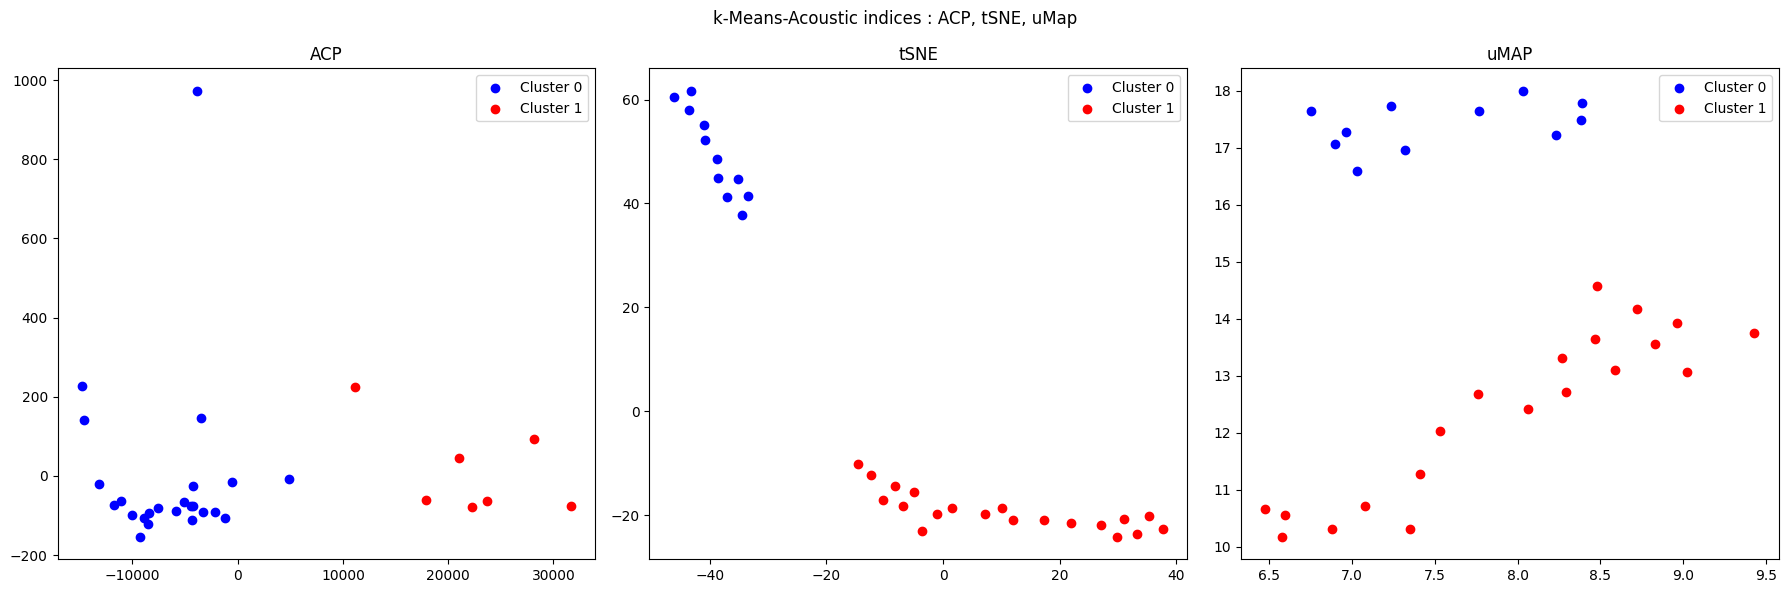

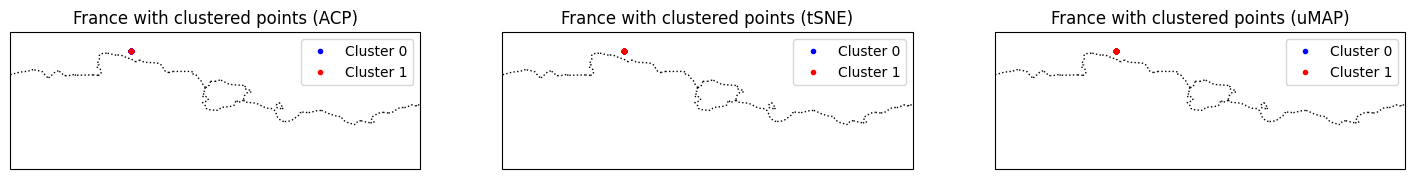

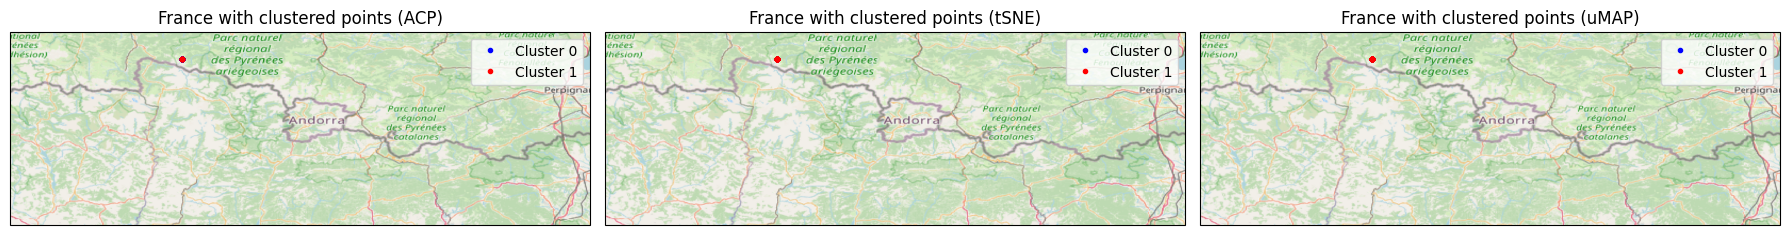

In [ ]:
cluster_colors = {0: 'blue', 1: 'red'}
cluster_colors_tsne = {0: 'blue', 1: 'red'}
cluster_colors_umap = {0: 'blue', 1: 'red'}
lon_min, lon_max, lat_min, lat_max = 0, 3, 42, 43

# Création de la figure et des sous-graphiques
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Tracé ACP
axs[0].set_title('ACP')
for cluster_label, color in cluster_colors.items():
    df_cluster = df[df['Cluster_ACP'] == cluster_label]
    axs[0].scatter(pca_result[df_cluster.index, 0], pca_result[df_cluster.index, 1], c=color, label=f'Cluster {cluster_label}')
axs[0].legend()

# Tracé t-SNE
axs[1].set_title('tSNE')
for cluster_label, color in cluster_colors_tsne.items():
    df_cluster_tsne = df[df['Cluster_tSNE'] == cluster_label]
    axs[1].scatter(tsne_result[df_cluster_tsne.index, 0], tsne_result[df_cluster_tsne.index, 1], c=color, label=f'Cluster {cluster_label}')
axs[1].legend()

# Tracé uMAP
axs[2].set_title('uMAP')
for cluster_label, color in cluster_colors_umap.items():
    df_cluster_umap = df[df['Cluster_uMAP'] == cluster_label]
    axs[2].scatter(umap_result[df_cluster_umap.index, 0], umap_result[df_cluster_umap.index, 1], c=color, label=f'Cluster {cluster_label}')
axs[2].legend()
plt.suptitle('k-Means-Acoustic indices : ACP, tSNE, uMap')

plt.tight_layout()
plt.savefig("/content/gdrive/MyDrive/Valeurs acoustiques/2022/Antras_Isard/SM4564_702L_Bleu/k-means_acoustic_indices_acp_tsne_umap.png")
plt.show()

# Définir les couleurs pour chaque cluster
cluster_colors_acp = {0: 'blue', 1: 'red'}


# Créer une nouvelle figure et les sous-tracés
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Tracer la carte de la France pour chaque représentation
for ax, cluster_colors, representation in zip(axs, [cluster_colors_acp, cluster_colors_tsne, cluster_colors_umap], ['ACP', 'tSNE', 'uMAP']):
    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Tracer les points en fonction de leur cluster
    for cluster_label, color in cluster_colors.items():
        df_cluster = df[df[f'Cluster_{representation}'] == cluster_label]
        ax.plot(df_cluster['LON'], df_cluster['LAT'], '.', color=color, label=f'Cluster {cluster_label}', transform=ccrs.PlateCarree())

    ax.set_title(f'France with clustered points ({representation})')
    ax.legend()


# Créer une nouvelle figure et les sous-tracés
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Tracer la carte de la France pour chaque représentation
for ax, cluster_colors, representation in zip(axs, [cluster_colors_acp, cluster_colors_tsne, cluster_colors_umap], ['ACP', 'tSNE', 'uMAP']):
    ax.set_extent([lon_min, lon_max, lat_min, lat_max])

    imagery = OSM()
    ax.add_image(imagery, 8)

    # Tracer les points en fonction de leur cluster
    for cluster_label, color in cluster_colors.items():
        df_cluster = df[df[f'Cluster_{representation}'] == cluster_label]
        ax.plot(df_cluster['LON'], df_cluster['LAT'], '.', color=color, label=f'Cluster {cluster_label}', transform=ccrs.PlateCarree())

    ax.set_title(f'France with clustered points ({representation})')
    ax.legend()

plt.tight_layout()
plt.savefig("/content/gdrive/MyDrive/Jonas Valeurs acoustiques/2022/Antras_Isard/SM4564_702L_Bleu/k-means_acoustic_indices_cartographie_acp_tsne_umap.png")
plt.show()
